### **Data Collection**

In [1]:
#importing required labraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# loading the clean data csv to a Pandas DataFrame
df=pd.read_csv("F:\Project\Classification\Loan approval prediction\clean_data.csv")

In [3]:
# print first 5 rows of the dataset
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0.0,1,0,5849,0.0,128.0,360.0,1.0,Y,0,0,1
1,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,N,1,0,0
2,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,Y,0,0,1
3,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,Y,0,0,1
4,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,Y,0,0,1


### **Split data**

In [4]:
from sklearn.model_selection import train_test_split
x = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42,stratify=y)

### **Logistic Regression**

In [5]:
from sklearn.linear_model import LogisticRegression #imported Logistic Regression model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score

logistic_model = LogisticRegression() # Logistic Regression instance created
logistic_model.fit(x_train,y_train) # model fitting

# Model evaluation
y_pred_test = logistic_model.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print(f"Test data confusion matrix : \n{cnf_matrix}")
Logistic_Regression_Accuracy = accuracy_score(y_test,y_pred_test)
print(f"Test data accuracy score : {Logistic_Regression_Accuracy}")
print('*'*70)
y_pred_train = logistic_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print(f"Train data confusion matrix : \n{cnf_matrix}")
acc = accuracy_score(y_train,y_pred_train)
print(f"Train data accuracy score : {acc}")

Test data confusion matrix : 
[[22 16]
 [ 2 83]]
Test data accuracy score : 0.8536585365853658
**********************************************************************
Train data confusion matrix : 
[[ 62  92]
 [  7 330]]
Train data accuracy score : 0.7983706720977597


### **Decision Tree**

In [6]:
from sklearn.tree import DecisionTreeClassifier # imported Decision Tree model

dt_model = DecisionTreeClassifier() # Decision Tree instance created
dt_model.fit(x_train,y_train) # # model fitting

# Model evaluation
y_pred_test = dt_model.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print(f"Test data confusion matrix : \n{cnf_matrix}")
Decision_Tree_Accuracy = accuracy_score(y_test,y_pred_test)
print(f"Test data accuracy score : {Decision_Tree_Accuracy}")
print('*'*70)
y_pred_train = dt_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print(f"Train data confusion matrix : \n{cnf_matrix}")
acc = accuracy_score(y_train,y_pred_train)
print(f"Train data accuracy score : {acc}")

Test data confusion matrix : 
[[22 16]
 [15 70]]
Test data accuracy score : 0.7479674796747967
**********************************************************************
Train data confusion matrix : 
[[154   0]
 [  0 337]]
Train data accuracy score : 1.0


### **Decision Tree Hyperparameter tunning**

In [7]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV # for hyperparameter tunning this two technique are used

# Decision Tree Hyperparameters
hyperparameters = {'criterion':['gini','entropy'],
                  'max_depth':np.arange(3,8),
                  'min_samples_split':np.arange(2,20),
                  'min_samples_leaf':np.arange(2,15)}
rscv_dt = RandomizedSearchCV(dt_model,hyperparameters,cv=5)  # here we are using RandomizedSearchCV to save time
rscv_dt.fit(x_train,y_train)

dt_clf = rscv_dt.best_estimator_  # thus are the best hyperparameter
dt_clf.fit(x_train,y_train)       # model fitting

# model evaluation
# calculating accuracy after hyperparameter tunning
y_pred_test = dt_clf.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print(f"Test data confusion matrix : \n{cnf_matrix}")
Decision_Tree_Hyperparameter_Accuracy = accuracy_score(y_test,y_pred_test)
print(f"Test data accuracy score : {Decision_Tree_Hyperparameter_Accuracy}")
print('*'*70)
y_pred_train = dt_clf.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print(f"Train data confusion matrix : \n{cnf_matrix}")
acc = accuracy_score(y_train,y_pred_train)
print(f"Train data accuracy score : {acc}")

Test data confusion matrix : 
[[22 16]
 [ 1 84]]
Test data accuracy score : 0.8617886178861789
**********************************************************************
Train data confusion matrix : 
[[ 64  90]
 [  7 330]]
Train data accuracy score : 0.8024439918533605


### **Decision tree model building with pruining**

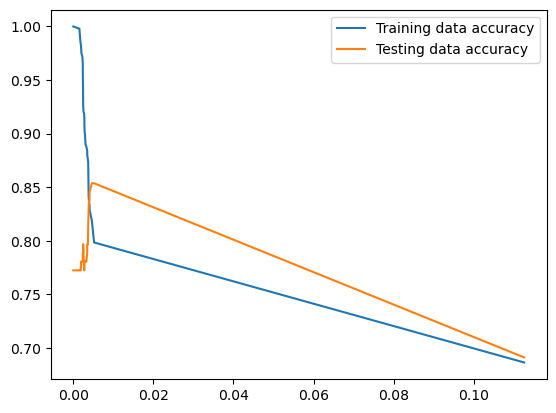

In [8]:
result = dt_model.cost_complexity_pruning_path(x_train,y_train) # Here we get dict of ccp-alpha and impuritie values

ccp_alpha_list = result['ccp_alphas'] # all ccp_alphas values stored

from numpy.random.mtrand import random
# for each ccp_alphas calculating training accuracy
for ccp_alpha in ccp_alpha_list:
  dt_pruining = DecisionTreeClassifier(random_state=10,ccp_alpha = ccp_alpha)
  dt_pruining.fit(x_train,y_train)
  train_accuracy = dt_pruining.score(x_train,y_train)

train_acc_list = []
test_acc_list = []
for ccp_alpha in ccp_alpha_list:
  dt_pruining = DecisionTreeClassifier(random_state=10,ccp_alpha = ccp_alpha)
  dt_pruining.fit(x_train,y_train)
  train_acc_list.append(dt_pruining.score(x_train,y_train))
  test_acc_list.append(dt_pruining.score(x_test,y_test))

# plot graph to find best ccp_alpha value
fig,ax = plt.subplots()
ax.plot(ccp_alpha_list,train_acc_list,label = "Training data accuracy")
ax.plot(ccp_alpha_list,test_acc_list,label = "Testing data accuracy")
ax.legend()

In [9]:
# find max test accuracy
np.where(test_acc_list == np.max(test_acc_list))

(array([41, 42], dtype=int64),)

In [10]:
dt_pruining = DecisionTreeClassifier(random_state=10,ccp_alpha =ccp_alpha_list[41] )
dt_pruining.fit(x_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.004636795655125594, random_state=10)

In [11]:
# calculating accuracy after pruining
y_pred_test = dt_pruining.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print(f"Test data confusion matrix : \n{cnf_matrix}")
Decision_Tree_Pruining_Accuracy = accuracy_score(y_test,y_pred_test)
print(f"Test data accuracy score : {Decision_Tree_Pruining_Accuracy}")
print('*'*70)
y_pred_train = dt_pruining.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print(f"Train data confusion matrix : \n{cnf_matrix}")
acc = accuracy_score(y_train,y_pred_train)
print(f"Train data accuracy score : {acc}")

Test data confusion matrix : 
[[24 14]
 [ 4 81]]
Test data accuracy score : 0.8536585365853658
**********************************************************************
Train data confusion matrix : 
[[ 73  81]
 [  8 329]]
Train data accuracy score : 0.8187372708757638


### **Random Forest**

In [12]:
from sklearn.ensemble import RandomForestClassifier # Random forest model imported

rf_model = RandomForestClassifier() # random Forest instance created
rf_model.fit(x_train,y_train)  # model fitting done

# model evaluation
# calculating accuracy of random forest model without hyperparameters tunning
y_pred_test = rf_model.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print(f"Test data confusion matrix : \n{cnf_matrix}")
Random_Forest_Accuracy = accuracy_score(y_test,y_pred_test)
print(f"Test data accuracy score : {Random_Forest_Accuracy}")
print('*'*70)
y_pred_train = rf_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print(f"Train data confusion matrix : \n{cnf_matrix}")
acc = accuracy_score(y_train,y_pred_train)
print(f"Train data accuracy score : {acc}")

Test data confusion matrix : 
[[24 14]
 [ 6 79]]
Test data accuracy score : 0.8373983739837398
**********************************************************************
Train data confusion matrix : 
[[154   0]
 [  0 337]]
Train data accuracy score : 1.0


### **Random forest hyperparameter tunning**

In [13]:
from sklearn.ensemble import RandomForestClassifier # Random forest model imported
rf_model = RandomForestClassifier() # random Forest instance created

hyperparameters = {'n_estimators':np.arange(10,200),
                   'criterion': ['gini', 'entropy'],
                   'max_depth':np.arange(3,8),
                   'max_depth':np.arange(3,8),
                   'min_samples_split':np.arange(4,20),
                   'min_samples_leaf':np.arange(3,10),
                   'max_features':[7],
                   'oob_score':[True],
                   'random_state':[10],
                   }
rscv_rf = RandomizedSearchCV(rf_model,hyperparameters,cv=5)
rscv_rf.fit(x_train,y_train)

rf_hyp = rscv_rf.best_estimator_  # all best hyperparameters are stored in variable
rf_hyp.fit(x_train,y_train) # train model with new parameters

# model evaluation
y_pred_test = rf_hyp.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print(f"Test data confusion matrix : \n{cnf_matrix}")
Random_Forest_Hyperparameter_Accuracy = accuracy_score(y_test,y_pred_test)
print(f"Test data accuracy score : {Random_Forest_Hyperparameter_Accuracy}")
print('*'*70)
y_pred_train = rf_hyp.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print(f"Train data confusion matrix : \n{cnf_matrix}")
acc = accuracy_score(y_train,y_pred_train)
print(f"Train data accuracy score : {acc}")

Test data confusion matrix : 
[[21 17]
 [ 1 84]]
Test data accuracy score : 0.8536585365853658
**********************************************************************
Train data confusion matrix : 
[[ 64  90]
 [  7 330]]
Train data accuracy score : 0.8024439918533605


### **Adaboost**

In [14]:
from sklearn.ensemble import AdaBoostClassifier # Adaboost imported

adb_model = AdaBoostClassifier() # Adaboost instance created
adb_model.fit(x_train,y_train) # Model fitting done

# Model evaluation
# calculating accuracy of Adaboost model evaluation
y_pred_test = adb_model.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print(f"Test data confusion matrix : \n{cnf_matrix}")
Adaboost_Accuracy = accuracy_score(y_test,y_pred_test)
print(f"Test data accuracy score : {Adaboost_Accuracy}")
print('*'*70)
y_pred_train = adb_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print(f"Train data confusion matrix : \n{cnf_matrix}")
acc = accuracy_score(y_train,y_pred_train)
print(f"Train data accuracy score : {acc}")

Test data confusion matrix : 
[[24 14]
 [ 8 77]]
Test data accuracy score : 0.8211382113821138
**********************************************************************
Train data confusion matrix : 
[[ 86  68]
 [ 14 323]]
Train data accuracy score : 0.8329938900203666


### **Adaboost hyperparameter tunning**

In [15]:
adb_clf = AdaBoostClassifier(random_state=10) # Adaboost instance created

hyperparameters = {'n_estimators':np.arange(10,100),
                   'learning_rate':np.arange(0,2,0.001)}
rscv_adb = RandomizedSearchCV(adb_clf,hyperparameters,cv=5)
rscv_adb.fit(x_train,y_train)

adb_hyp = rscv_adb.best_estimator_ # all best hyperparameters are stored in variable
adb_hyp.fit(x_train,y_train)  # train model with new parameters

# calculating accuracy of Adaboost after hyperparameter tunning model evaluation
y_pred_test = adb_hyp.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print(f"Test data confusion matrix : \n{cnf_matrix}")
Adaboost_hyperparameter_Accuracy = accuracy_score(y_test,y_pred_test)
print(f"Test data accuracy score : {Adaboost_hyperparameter_Accuracy}")
print('*'*70)
y_pred_train = adb_hyp.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print(f"Train data confusion matrix : \n{cnf_matrix}")
acc = accuracy_score(y_train,y_pred_train)
print(f"Train data accuracy score : {acc}")

Test data confusion matrix : 
[[21 17]
 [ 1 84]]
Test data accuracy score : 0.8536585365853658
**********************************************************************
Train data confusion matrix : 
[[ 61  93]
 [  6 331]]
Train data accuracy score : 0.7983706720977597


### **SVM (Support vector machine)**


In [16]:
from sklearn.svm import SVC # Support vector machine imported for classification type of problem
from sklearn.preprocessing import StandardScaler # SVM scalling is must

std_scaler = StandardScaler() # Standard scaler instance created
x_scaled_array = std_scaler.fit_transform(x)
# y_scaled_array = std_scaler.fit(y)
x_scaled = pd.DataFrame(x_scaled_array,columns=x.columns)

# split data
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20,random_state=42,stratify=y)

svm_clf = SVC() # SVM classification instance created
svm_clf.fit(x_train,y_train)

# calculating accuracy of SVM model evaluation
y_pred_test = adb_model.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print(f"Test data confusion matrix : \n{cnf_matrix}")
SVM_Accuracy = accuracy_score(y_test,y_pred_test)
print(f"Test data accuracy score : {SVM_Accuracy}")
print('*'*70)
y_pred_train = adb_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print(f"Train data confusion matrix : \n{cnf_matrix}")
acc = accuracy_score(y_train,y_pred_train)
print(f"Train data accuracy score : {acc}")

Test data confusion matrix : 
[[38  0]
 [85  0]]
Test data accuracy score : 0.3089430894308943
**********************************************************************
Train data confusion matrix : 
[[154   0]
 [337   0]]
Train data accuracy score : 0.3136456211812627


### **SVM (Support vector machine) hyperparameter tunning**


In [17]:
svm_clf = SVC() # SVM classification instance created
hyperparameters = {'C':np.arange(1,50),
                   'kernel':['linear', 'poly', 'rbf', 'sigmoid'],}

rscv_svm = RandomizedSearchCV(svm_clf,hyperparameters,cv=5)
rscv_svm.fit(x_train,y_train)

svm_hyp = rscv_svm.best_estimator_ # all best hyperparameters are stored in variable
svm_hyp.fit(x_train,y_train)  # train model with new parameters

# calculating accuracy of SVM model evaluation after hyperparameter
y_pred_test = svm_hyp.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print(f"Test data confusion matrix : \n{cnf_matrix}")
SVM_Hyperparameter_Accuracy = accuracy_score(y_test,y_pred_test)
print(f"Test data accuracy score : {SVM_Hyperparameter_Accuracy}")
print('*'*70)
y_pred_train = svm_hyp.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print(f"Train data confusion matrix : \n{cnf_matrix}")
acc = accuracy_score(y_train,y_pred_train)
print(f"Train data accuracy score : {acc}")

Test data confusion matrix : 
[[21 17]
 [ 1 84]]
Test data accuracy score : 0.8536585365853658
**********************************************************************
Train data confusion matrix : 
[[ 61  93]
 [  6 331]]
Train data accuracy score : 0.7983706720977597


### **KNN (K-Nearest Neighbour)**

In [18]:
data = {'Model name': ['logistic Regression', 'Decision tree', 'Decision tree hyperparameter', 'Decision tree pruining','Random forest','random forest hyperparameter','adaboost','Adaboost hyperparameter','SVM','SVM hyperparameter'],
        'Accuracy': [Logistic_Regression_Accuracy,Decision_Tree_Accuracy,Decision_Tree_Hyperparameter_Accuracy,Decision_Tree_Pruining_Accuracy,Random_Forest_Accuracy,Random_Forest_Hyperparameter_Accuracy,Adaboost_Accuracy,Adaboost_hyperparameter_Accuracy,SVM_Accuracy,SVM_Hyperparameter_Accuracy]}

df = pd.DataFrame(data,columns=['Model name','Accuracy'])

print(df.sort_values(by='Accuracy'))


                     Model name  Accuracy
8                           SVM  0.308943
1                 Decision tree  0.747967
6                      adaboost  0.821138
4                 Random forest  0.837398
0           logistic Regression  0.853659
3        Decision tree pruining  0.853659
5  random forest hyperparameter  0.853659
7       Adaboost hyperparameter  0.853659
9            SVM hyperparameter  0.853659
2  Decision tree hyperparameter  0.861789
